# **kmean-clustering**

### Mengapa perlu clustering?
Data sering kali tidak memiliki label → Unsupervised Learning ->  
Clustering membantu mengelompokkan data berdasarkan kesamaan karakteristik

### apa itu k-means clustering?
Teknik pengelompokan (clustering) berbasis partisi -> Membagi data menjadi K kelompok berdasarkan jarak ->   
Setiap kelompok direpresentasikan oleh centroid (rata-rata dari titik dalam kluster)


###  tujuan dan fungsi
- Meminimalkan variasi dalam kluster (within-cluster variance)   
- Mengelompokkan objek sehingga:  
  Objek dalam kluster sehomogen mungkinObjek antar kluster seheterogen mungkin


![Gambar Contoh](Picture1.png)
![Gambar Contoh](Picture2.png)


# **Langkah-langkah algoritma K-Means**
1.Tentukan jumlah kluster K  
2.Pilih K centroid awal secara acak  
3.Hitung jarak setiap data ke tiap centroid  
4.Kelompokkan data berdasarkan centroid terdekat  
5.Hitung ulang centroid dari rata-rata anggota kluster  
6.Ulangi langkah 3–5 hingga konvergen (tidak ada perubahan signifikan)


## **kelebihan dan kekurangan**
kelebihan  
- cepat dan efisien  
- Mudah dipahami dan implementasikan  
- bekerja baik pada data besar  
- hasil stabil jika inisialisasi bagus  
  
kekurangan
- harus memnentukan nilai K Awal  
- sensitif pada outlier  
- dipengaruhi oleh skala dan dimensi data  
- hanya cocok unutk bentuk kluster sferis


## segemntasi citra satelite


![gambar](Picture3.png)


## **Studi Kasus – Segmentasi Pelanggan**  
### Contoh: Data transaksi toko online  
Variabel: Umur, Frekuensi Belanja, Rata-Rata Pembelanjaan  
Tujuan: Membuat segmentasi pelanggan untuk strategi pemasaran  
Hasil: Kluster seperti “Pelanggan Setia”, “Pelanggan tidak setia”, dll.


## **Implementasi**

In [7]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd

# Baca data
data = pd.read_csv("combined_data.csv")
data = data.drop(columns=['sepal_width', 'petal_length', 'petal_width'])

# Diskretisasi
discretizer = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
binned = discretizer.fit_transform(data[['sepal_length']])

# Masukkan ke dataframe baru
df_kategori = pd.DataFrame(binned, columns=['sepal_length_bin'])

# Lihat hasil
print(df_kategori.head())


   sepal_length_bin
0               0.0
1               0.0
2               0.0
3               0.0
4               0.0


In [9]:
import pandas as pd

# Baca data
data = pd.read_csv("combined_data.csv")
data = data.drop(columns=['sepal_width', 'petal_length', 'petal_width'])

# Diskretisasi jadi 4 bin kategori: A, B, C, D
labels = ['A', 'B', 'C', 'D']
df_kategori = data.copy()
df_kategori['sepal_length'] = pd.cut(df_kategori['sepal_length'], bins=4, labels=labels)

# Lihat hasil
print(df_kategori.head())


   id        class sepal_length
0   1  Iris-setosa            A
1   2  Iris-setosa            A
2   3  Iris-setosa            A
3   4  Iris-setosa            A
4   5  Iris-setosa            A


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv('combined_data.csv')

# Ambil fitur numerik untuk clustering
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']].values

# Inisiasi dan latih model KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Visualisasi hasil clustering (gunakan dua fitur pertama agar bisa diplot 2D)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Hasil K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 800x600 with 0 Axes>

## **Evaluasi Hasil Klustering**

- Inertia: Jumlah kuadrat jarak antara titik dan centroid  
- Silhouette Score: Ukuran seberapa mirip suatu objek dengan klusternya dibanding kluster lain  
- Elbow Method: Untuk memilih nilai K optimal  


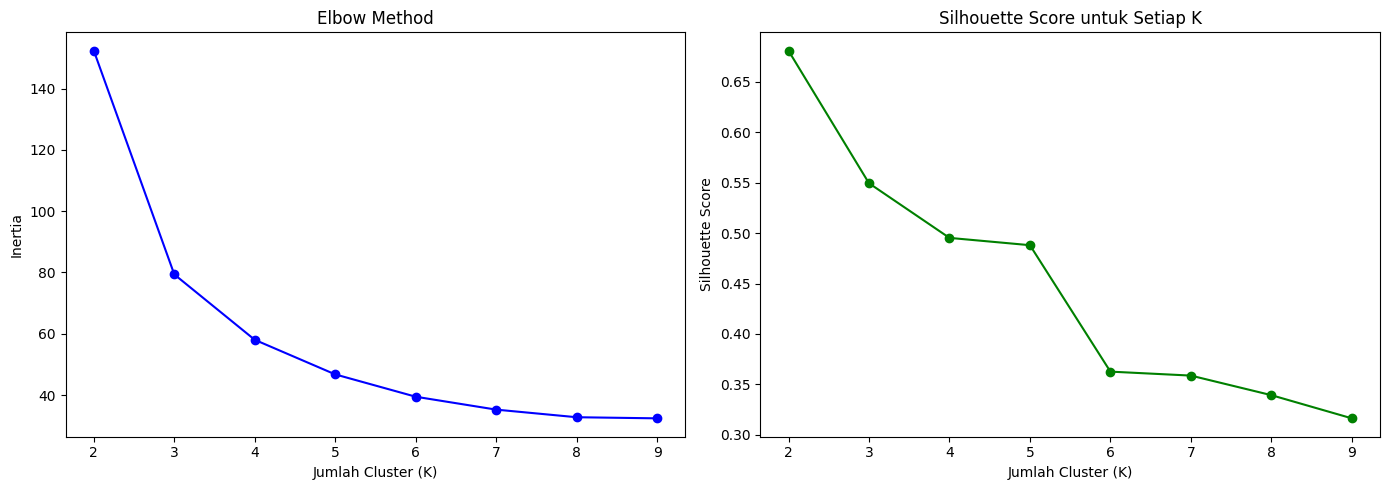

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

# Load data
df = pd.read_csv('combined_data.csv')
X = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']].values

# Elbow method dan Silhouette Score
inertias = []
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(K_range, sil_scores, 'go-')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score untuk Setiap K')

plt.tight_layout()
plt.show()


## Inertia (Sum Square Error / SSE)

### Rumus Inertia:

$$
\text{Inertia} = \sum_{i=1}^{n} \| x_i - \mu_{c_i} \|^2
$$

### Dimana:
- $ x_i $: Titik data ke-*i*
- $mu_{c_i}$: Centroid dari cluster tempat $x_i$ berada  

Semakin kecil nilai **inertia**, maka:
- Jarak antara titik data dengan pusat cluster (centroid) semakin kecil
- Klaster yang terbentuk semakin **padat**, dan
- Hasil clustering dianggap **lebih baik**  

> **Catatan:** Inertia akan selalu turun jika nilai K ditambah. Maka, untuk menentukan jumlah cluster yang optimal, perlu menggunakan metode seperti **Elbow Method** atau **Silhouette Score**.


## Interpretasi Nilai Inertia

| **Nilai Inertia**           | **Arti**                                                                 |
|-----------------------------|---------------------------------------------------------------------------|
| **Sangat kecil** (mendekati 0) | Klaster sangat kompak dan semua titik dekat dengan centroidnya → **sangat baik** |
| **Kecil hingga sedang**     | Klaster cukup baik dan dapat diterima dalam banyak kasus                 |
| **Besar**                   | Klaster tidak rapat, mungkin distribusi datanya tidak cocok dengan K-Means atau nilai K terlalu kecil |

# Metode Elbow

## Menilai Inertia Secara Relatif

Metode Elbow digunakan untuk **menentukan jumlah klaster optimal** (nilai `k`) dalam algoritma K-Means, dengan cara:

1. Menghitung nilai **inertia** untuk berbagai nilai `k`
2. Memplot `k` terhadap inertia
3. Mencari titik "tekukan" (elbow point), yaitu saat penurunan inertia mulai melambat

### Ilustrasi:

| **k** | **Inertia**             |
|-------|--------------------------|
| 1     | 10.0                     |
| 2     | 3.0 ← elbow point       |
| 3     | 1.5                     |
| 4     | 0.8                     |

Di sini, **k = 2** memberikan penurunan besar pertama.  
Tapi dari k=2 ke k=3, penurunan sudah **tidak sebesar sebelumnya**.  
Maka, **k = 2 adalah pilihan optimal** meski inertia belum mencapai nol.






## Tip untuk Nilai Inertia

| **Faktor**      | **Panduan**                                                                 |
|------------------|----------------------------------------------------------------------------|
| Skala data       | Pastikan data sudah dinormalisasi agar inertia bisa dibandingkan antar fitur |
| Jumlah data      | Untuk dataset besar, inertia cenderung besar juga walaupun kluster bagus     |
| Visualisasi      | Gabungkan dengan plot klaster untuk memeriksa bentuk kluster                |



**Catatan Penting:**
- Nilai inertia tidak bisa dibandingkan antar dataset yang berbeda tanpa penyesuaian.
- **Normalisasi fitur sangat krusial**, terutama saat fitur memiliki skala yang sangat berbeda.
- Gunakan inertia **bersama metode lain** seperti **Silhouette Score** untuk evaluasi menyeluruh.


## Silhouette Analysis

**Silhouette Analysis** mengukur seberapa baik suatu titik data sesuai dengan klaster tempat ia dikelompokkan, dibandingkan dengan klaster lain.

Untuk setiap titik *i*, silhouette score *s(i)* dihitung sebagai:


$$s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}$$


**Keterangan:**

- *a(i)*: Rata-rata jarak titik *i* ke semua titik lain dalam **klaster yang sama**
- *b(i)*: Rata-rata jarak titik *i* ke semua titik dalam **klaster terdekat (tetangga)**

## **Resume**  

- K-Means adalah algoritma clustering yang powerful dan mudah diterapkan  
- Cocok untuk data numerik dengan pola distribusi sederhana  
- Namun, hasil sangat bergantung pada pemilihan K dan posisi centroid awal  
- Dapat dikombinasikan dengan metode lain seperti PCA untuk reduksi dimensi  


## Komputasi K-Menas DATA IRIS

Konvergen pada iterasi ke-7
   sepal_length  sepal_width  petal_length  petal_width  cluster
0           5.1          3.5           1.3          0.4        1
1           4.9          3.0           1.4          0.2        1
2           4.7          3.2           1.3          0.2        1
3           4.6          3.1           1.5          0.2        1
4           5.0          3.6           1.4          0.2        1


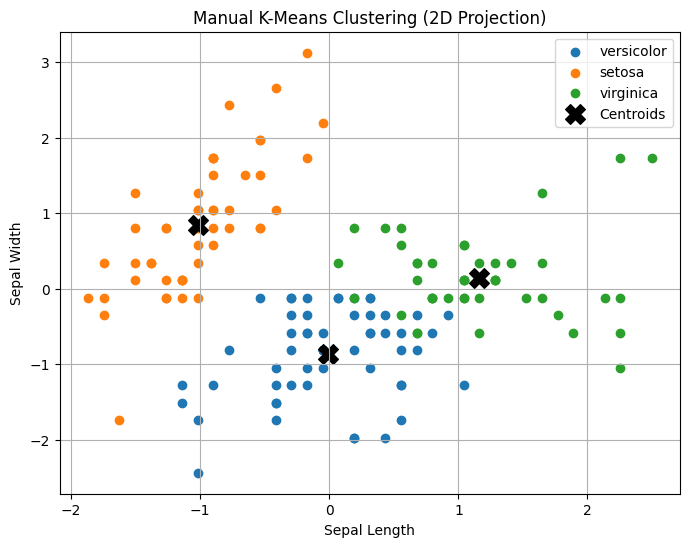

cluster
0    56
1    50
2    44
Name: count, dtype: int64


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Load data (contoh dari file iris atau buat sendiri) ===
data = pd.read_csv("combined_data.csv")
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

# === 2. Standarisasi (optional, tapi disarankan) ===
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 3. Tentukan K dan inisialisasi centroid secara acak ===
K = 3
np.random.seed(42)
initial_indices = np.random.choice(len(X_scaled), K, replace=False)
centroids = X_scaled[initial_indices]

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# === 4. Iterasi K-Means manual ===
max_iter = 100
for iteration in range(max_iter):
    # a. Hitung jarak setiap titik ke tiap centroid
    distances = np.array([[euclidean_distance(x, c) for c in centroids] for x in X_scaled])

    # b. Assign kluster berdasarkan jarak minimum
    cluster_labels = np.argmin(distances, axis=1)

    # c. Hitung centroid baru
    new_centroids = np.array([X_scaled[cluster_labels == k].mean(axis=0) for k in range(K)])

    # d. Cek konvergensi (jika centroid tidak berubah signifikan)
    if np.allclose(centroids, new_centroids):
        print(f"Konvergen pada iterasi ke-{iteration+1}")
        break

    centroids = new_centroids

# === 5. Tampilkan hasil klustering ===
cluster_spesies = {
    0: 'versicolor',
    1: 'setosa',
    2: 'virginica'
}

data['cluster'] = cluster_labels
print(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster']].head())

# (Opsional) === 6. Visualisasi 2D (pakai 2 fitur) ===
plt.figure(figsize=(8, 6))
for k in range(K):
    cluster_points = X_scaled[cluster_labels == k]
    label = cluster_spesies [k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label= label)
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.title("Manual K-Means Clustering (2D Projection)")
plt.grid(True)
plt.show()

print(data['cluster'].value_counts())




Jumlah iterasi: 4
   id        class  petal_length  petal_width  sepal_length  sepal_width  \
0   1  Iris-setosa           1.3          0.4           5.1          3.5   
1   2  Iris-setosa           1.4          0.2           4.9          3.0   
2   3  Iris-setosa           1.3          0.2           4.7          3.2   
3   4  Iris-setosa           1.5          0.2           4.6          3.1   
4   5  Iris-setosa           1.4          0.2           5.0          3.6   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        0  
Inertia (total within-cluster sum of squares): 223.41718161599937
Silhouette Score: 0.5803586578135116


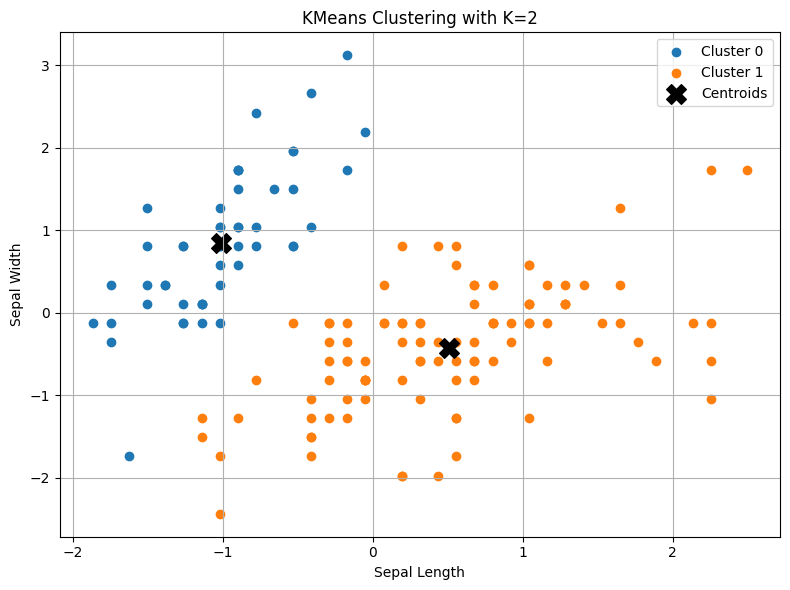

cluster
0    56
1    50
2    44
Name: count, dtype: int64


In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Ambil fitur
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Standarisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Tentukan jumlah klaster
K = 2
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)

# Fit model
kmeans.fit(scaled_features)

# Tambahkan hasil kluster ke DataFrame
df['cluster'] = kmeans.labels_

# Tampilkan hasil
print("Jumlah iterasi:", kmeans.n_iter_)
print(df.head())

# Hitung inertia
print("Inertia (total within-cluster sum of squares):", kmeans.inertia_)

# Hitung silhouette score
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", sil_score)

# Visualisasi menggunakan dua fitur pertama (misalnya: sepal_length dan sepal_width)
plt.figure(figsize=(8, 6))
for cluster_id in range(K):
    cluster_points = scaled_features[df['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

# Centroid (dalam bentuk yang sudah diskalakan)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'KMeans Clustering with K={K}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(data['cluster'].value_counts())


Jumlah iterasi: 4
   id        class  petal_length  petal_width  sepal_length  sepal_width  \
0   1  Iris-setosa           1.3          0.4           5.1          3.5   
1   2  Iris-setosa           1.4          0.2           4.9          3.0   
2   3  Iris-setosa           1.3          0.2           4.7          3.2   
3   4  Iris-setosa           1.5          0.2           4.6          3.1   
4   5  Iris-setosa           1.4          0.2           5.0          3.6   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
Inertia (total within-cluster sum of squares): 141.66419582488086
Silhouette Score: 0.4564441743127246


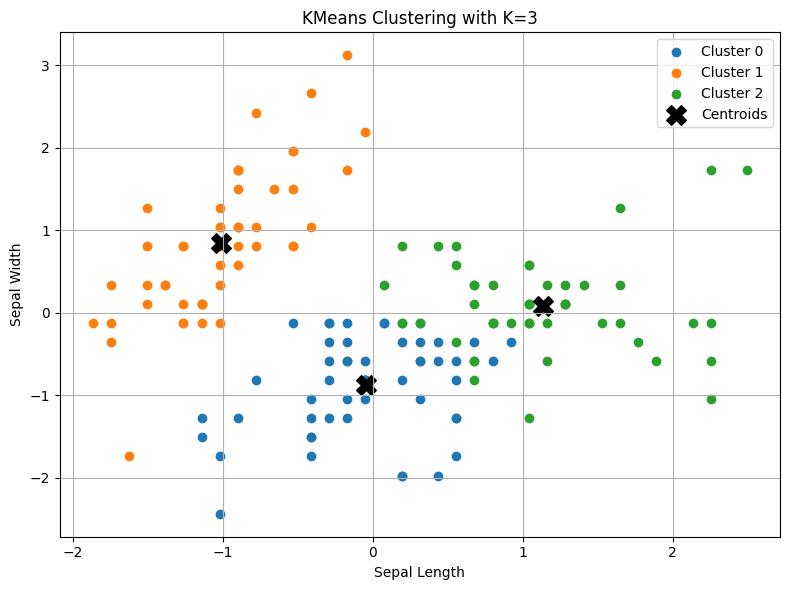

cluster
0    56
1    50
2    44
Name: count, dtype: int64


In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Ambil fitur
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Standarisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Tentukan jumlah klaster
K = 3
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)

# Fit model
kmeans.fit(scaled_features)

# Tambahkan hasil kluster ke DataFrame
df['cluster'] = kmeans.labels_

# Tampilkan hasil
print("Jumlah iterasi:", kmeans.n_iter_)
print(df.head())

# Hitung inertia
print("Inertia (total within-cluster sum of squares):", kmeans.inertia_)

# Hitung silhouette score
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", sil_score)

# Visualisasi menggunakan dua fitur pertama (misalnya: sepal_length dan sepal_width)
plt.figure(figsize=(8, 6))
for cluster_id in range(K):
    cluster_points = scaled_features[df['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

# Centroid (dalam bentuk yang sudah diskalakan)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'KMeans Clustering with K={K}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(data['cluster'].value_counts())


In [22]:
print("\nJumlah data per cluster:")
print(df['cluster'].value_counts().sort_index())



Jumlah data per cluster:
cluster
0    53
1    50
2    47
Name: count, dtype: int64


Jumlah iterasi: 4
   id        class  petal_length  petal_width  sepal_length  sepal_width  \
0   1  Iris-setosa           1.3          0.4           5.1          3.5   
1   2  Iris-setosa           1.4          0.2           4.9          3.0   
2   3  Iris-setosa           1.3          0.2           4.7          3.2   
3   4  Iris-setosa           1.5          0.2           4.6          3.1   
4   5  Iris-setosa           1.4          0.2           5.0          3.6   

   cluster  
0        2  
1        3  
2        3  
3        3  
4        2  
Inertia (total within-cluster sum of squares): 115.14281149224746
Silhouette Score: 0.3835223273461591


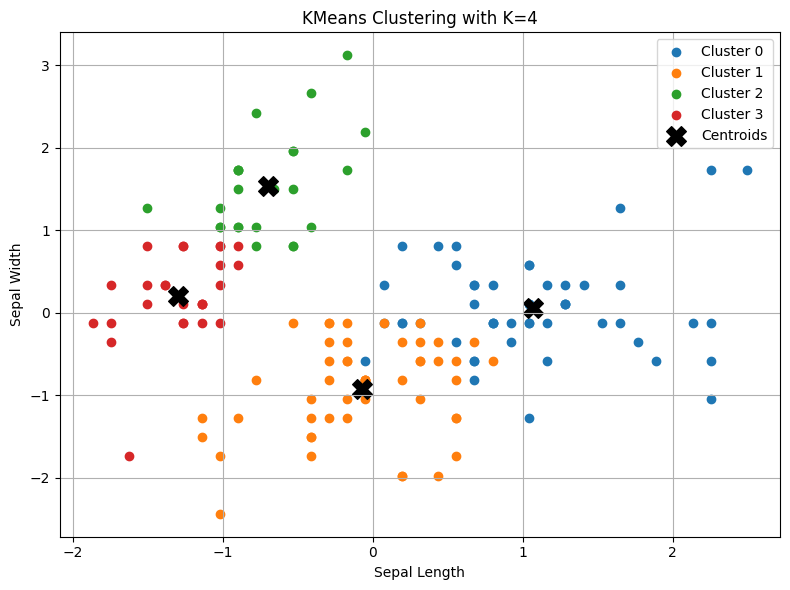

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Ambil fitur
features = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Standarisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Tentukan jumlah klaster
K = 4
kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)

# Fit model
kmeans.fit(scaled_features)

# Tambahkan hasil kluster ke DataFrame
df['cluster'] = kmeans.labels_

# Tampilkan hasil
print("Jumlah iterasi:", kmeans.n_iter_)
print(df.head())

# Hitung inertia
print("Inertia (total within-cluster sum of squares):", kmeans.inertia_)

# Hitung silhouette score
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print("Silhouette Score:", sil_score)

# Visualisasi menggunakan dua fitur pertama (misalnya: sepal_length dan sepal_width)
plt.figure(figsize=(8, 6))
for cluster_id in range(K):
    cluster_points = scaled_features[df['cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

# Centroid (dalam bentuk yang sudah diskalakan)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'KMeans Clustering with K={K}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Index(['id', 'class', 'petal_length', 'petal_width', 'sepal_length',
       'sepal_width'],
      dtype='object')
id              0
class           0
petal_length    0
petal_width     0
sepal_length    0
sepal_width     0
dtype: int64


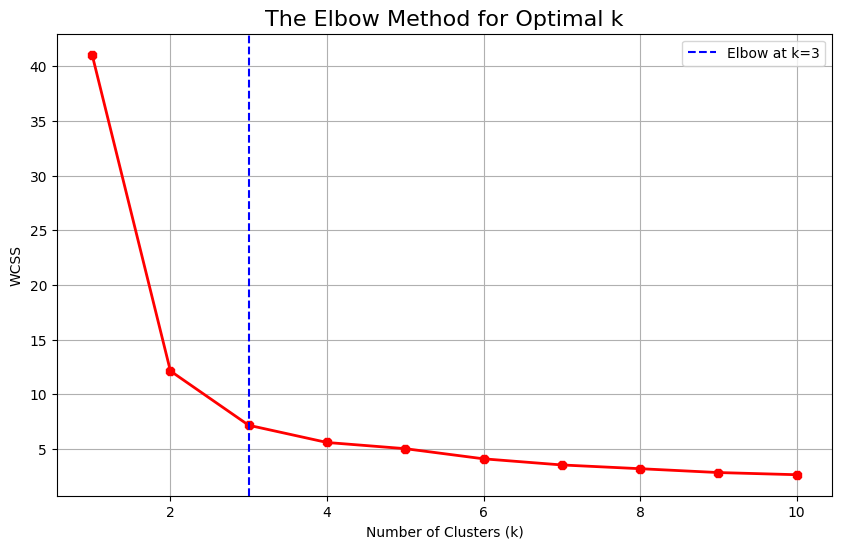

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# === 1. Load data ===
iris = pd.read_csv('combined_data.csv')

# Pastikan kolom benar dan tanpa missing value
print(iris.columns)
print(iris.isnull().sum())

# Ambil hanya kolom numerik yang diperlukan
iris_x = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Hapus/isi NaN jika ada
iris_x = iris_x.dropna()

# === 2. Scaling dengan MinMax ===
x_iris = np.array(iris_x)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_iris)

# === 3. Hitung WCSS untuk berbagai nilai k ===
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(x_scaled)
    wcss.append(km.inertia_)

# === 4. Visualisasi Elbow Method ===
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.axvline(x=3, ls='--', color='blue', label='Elbow at k=3')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters (k)')
plt.title('The Elbow Method for Optimal k', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
